# Traders@SMU Datathon Challenge

Implementing a ML model of a Random Forest Classifier to determine benefits of wearing a health tracker.


## 1: Pre-Processing Data

Preparing our data for the model.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

first_data_ex_cal = pd.read_csv("sleep.csv", header=0)
first_data_ex_cal.head()
# Will find calorie column later on , could not find, if anything we will randomize

num_rows_ex_cal = first_data_ex_cal.shape[0]
num_cols_ex_cel = first_data_ex_cal.shape[1]
print("Number of rows:", num_rows_ex_cal)
print("Number of columns:", num_cols_ex_cel)

Number of rows: 374
Number of columns: 13


In [58]:
# Generate random calorie intake values for each row
calorie_intake = np.random.randint(1500, 3000, size=num_rows_ex_cal)

# Add the "Calorie Intake" column to the DataFrame
first_data_ex_cal["Calorie Intake"] = calorie_intake

# Display the updated DataFrame
print(first_data_ex_cal.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  Calorie Intake  
0         126/83          77         4200            NaN            1606  
1 

In [59]:
# Assuming 'first_data_ex_cal' is your DataFrame
rows_to_update = first_data_ex_cal[(first_data_ex_cal['Sleep Disorder'].notnull()) & (first_data_ex_cal['Gender'] == 'Male')]

# Recalculate Calorie Intake with the new range (800-1800) and (2400-4000)
new_calorie_intake = np.random.choice([np.random.randint(800, 1800), np.random.randint(2400, 4000)], size=len(rows_to_update))
first_data_ex_cal.loc[rows_to_update.index, 'Calorie Intake'] = new_calorie_intake

print(first_data_ex_cal.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  Calorie Intake  
0         126/83          77         4200            NaN            1606  
1 

In [61]:
# Assuming 'first_data_ex_cal' is your DataFrame
rows_to_update = first_data_ex_cal[(first_data_ex_cal['Sleep Disorder'].notnull()) & (first_data_ex_cal['Gender'] == 'Female')]

# Recalculate Calorie Intake with the new range (800-1800) and (2400-4000)
new_calorie_intake = np.random.choice([np.random.randint(800, 1800), np.random.randint(2400, 4000)], size=len(rows_to_update))
first_data_ex_cal.loc[rows_to_update.index, 'Calorie Intake'] = new_calorie_intake
first_data_ex_cal.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Calorie Intake
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,1606
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,2181
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1666
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1371
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1371


In [16]:
final_data_2 = first_data_ex_cal

In [17]:
final_data_2.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Calorie Intake
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,2877
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,2163
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1933
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,2916
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1797


In [18]:
#Clean our unnecessary columns, no need for BMI, ID, or Occupation

if 'BMI Category' in final_data_2.columns:
  final_data_2 = final_data_2.drop('BMI Category', axis=1)

if 'Person ID' in final_data_2.columns:
  final_data_2 = final_data_2.drop('Person ID', axis=1)

if 'Occupation' in final_data_2.columns:
  final_data_2 = final_data_2.drop('Occupation', axis=1)


In [19]:
final_data_2.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Calorie Intake
0,Male,27,6.1,6,42,6,126/83,77,4200,NaN,2877
1,Male,28,6.2,6,60,8,125/80,75,10000,NaN,2163
2,Male,28,6.2,6,60,8,125/80,75,10000,NaN,1933
3,Male,28,5.9,4,30,8,140/90,85,3000,Sleep Apnea,2916
4,Male,28,5.9,4,30,8,140/90,85,3000,Sleep Apnea,1797


In [20]:
# Convert String columns into binary numbers for simplicity
Iso_df = final_data_2.copy()

# Mutate Gender column
Iso_df['Gender'] = Iso_df['Gender'].map({'Male': 0, 'Female': 1})

# Mutate Sleep Disorder column
Iso_df['Sleep Disorder'] = Iso_df['Sleep Disorder'].fillna(0)
Iso_df['Sleep Disorder'] = Iso_df['Sleep Disorder'].map({'Sleep Apnea': 1, 'Insomnia': 2, 0: 0})

# Drop Blood Pressure column
if 'Blood Pressure' in Iso_df.columns:
  Iso_df = Iso_df.drop('Blood Pressure', axis=1)

Iso_df.head()


,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Calorie Intake
0,0,27,6.1,6,42,6,77,4200,0,2877
1,0,28,6.2,6,60,8,75,10000,0,2163
2,0,28,6.2,6,60,8,75,10000,0,1933
3,0,28,5.9,4,30,8,85,3000,1,2916
4,0,28,5.9,4,30,8,85,3000,1,1797


## 2: Building the Model

We are creating an unsupervised and supervised model to detect the presence of sleep disorders as well as detetcing anomolies in our data. Between Heart Rate and Age to build "profiles" on people more likely to develop sleep disorders.

##2.1: Isolation Forest - Unsupervised Learning model

In [21]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.095, random_state=42)
iso_forest.fit(Iso_df)

IsolationForest(contamination=0.095, random_state=42)

In [22]:
Iso_df['anomaly'] = iso_forest.predict(Iso_df)

In [23]:
Iso_df['anomaly'] = Iso_df['anomaly'].map({1: 0, -1: 1})  # 0 for normal, 1 for anomaly

In [24]:
anomalies = Iso_df[Iso_df['anomaly'] == 1]
print(anomalies)

     Gender  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0         0   27             6.1                 6                       42   
1         0   28             6.2                 6                       60   
2         0   28             6.2                 6                       60   
3         0   28             5.9                 4                       30   
4         0   28             5.9                 4                       30   
5         0   28             5.9                 4                       30   
6         0   29             6.3                 6                       40   
16        1   29             6.5                 5                       40   
18        1   29             6.5                 5                       40   
30        1   30             6.4                 5                       35   
31        1   30             6.4                 5                       35   
68        1   33             6.2                 6  

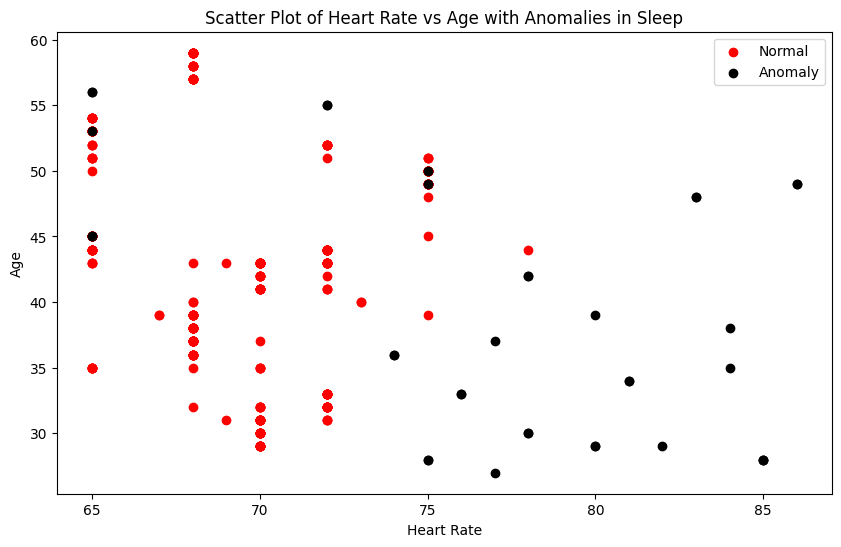

In [25]:
# prompt: create scatterplot for anomolies , make anomolies black and normal points red. Make the X Heart rate and The Y Age

plt.figure(figsize=(10, 6))
plt.scatter(Iso_df[Iso_df['anomaly'] == 0]['Heart Rate'], Iso_df[Iso_df['anomaly'] == 0]['Age'], color='red', label='Normal')
plt.scatter(Iso_df[Iso_df['anomaly'] == 1]['Heart Rate'], Iso_df[Iso_df['anomaly'] == 1]['Age'], color='black', label='Anomaly')
plt.xlabel('Heart Rate')
plt.ylabel('Age')
plt.title('Scatter Plot of Heart Rate vs Age with Anomalies in Sleep')
plt.legend()
plt.show()

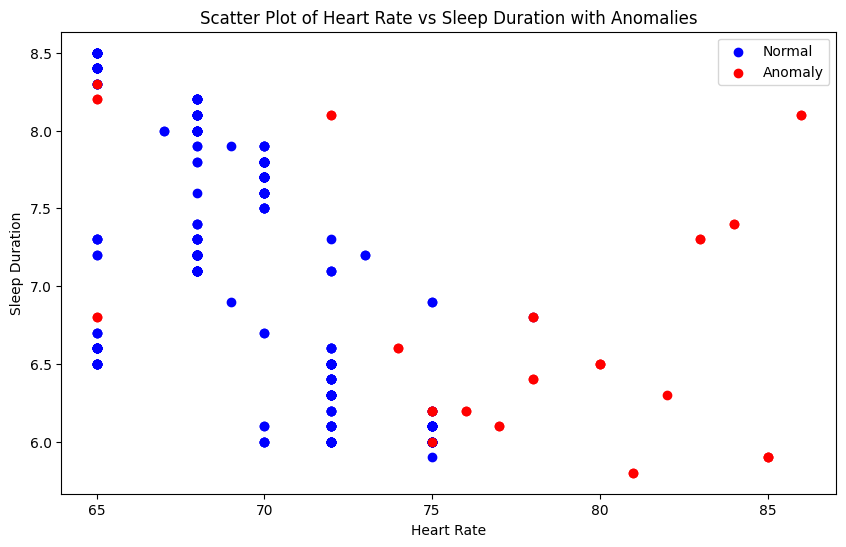

In [26]:
# prompt: Create scatter plot for anomolies between heart rate and sleep duration

plt.figure(figsize=(10, 6))
plt.scatter(Iso_df[Iso_df['anomaly'] == 0]['Heart Rate'], Iso_df[Iso_df['anomaly'] == 0]['Sleep Duration'], color='blue', label='Normal')
plt.scatter(Iso_df[Iso_df['anomaly'] == 1]['Heart Rate'], Iso_df[Iso_df['anomaly'] == 1]['Sleep Duration'], color='red', label='Anomaly')
plt.xlabel('Heart Rate')
plt.ylabel('Sleep Duration')
plt.title('Scatter Plot of Heart Rate vs Sleep Duration with Anomalies')
plt.legend()
plt.show()

## 2.2: Gradient Boosting - Supervised Model

Predicting the presence of sleep disorders


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

In [52]:
Iso_df['Sleep Disorder'] = Iso_df['Sleep Disorder'].replace(2, 1)


X = Iso_df[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Calorie Intake']]
Y = Iso_df['Sleep Disorder']


k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
accuracies = []
fold = 1

model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    random_state=42
)
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # print(f"Fold {fold}: Accuracy = {accuracy}")
    # print("Classification Report:\n", classification_report(y_test, y_pred))
    # print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    fold += 1

print(f"Mean Accuracy: {sum(accuracies) / k}")


Mean Accuracy: 0.9331531531531532


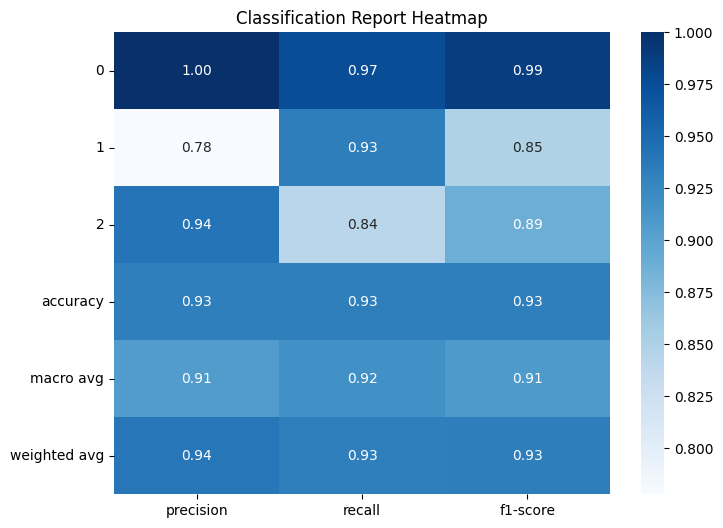

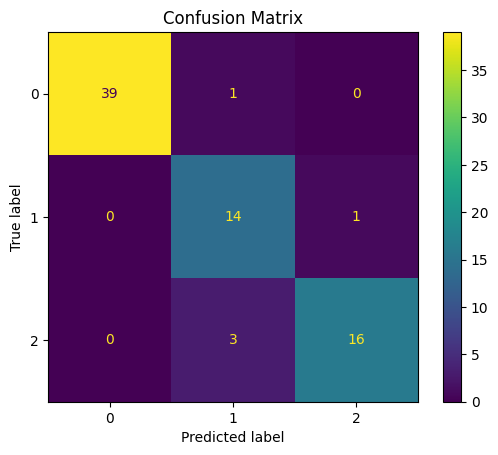

In [53]:
# Classification Report Visualization
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', fmt=".2f", ax=ax)
plt.title('Classification Report Heatmap')
plt.show()


# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()